# Clustering

Clustering is an unsupervised machine learning technique that is often used to find similarities in data.


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import KMeansElbow 
%matplotlib inline

## Load, examine and plot data

In [40]:
df = pd.read_csv('../data/Mall_Customers.csv')

In [41]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df.isnull().sum() # examine for missing values in each column

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [43]:
pattern = r"\(.*\)",""
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('$','').str.replace('-','')

In [44]:
df.head()

,customerid,genre,age,annual_income_k,spending_score_1100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
df['male'] = (df['genre'] == 'Male').astype(int)

In [29]:
df.head()

,customerid,genre,age,annual_income_k,spending_score_1100,male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [30]:
df.columns

Index(['customerid', 'genre', 'age', 'annual_income_k', 'spending_score_1100',
       'male'],
      dtype='object')

In [46]:
df.shape

(200, 6)

/Users/GB/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/GB/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/GB/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


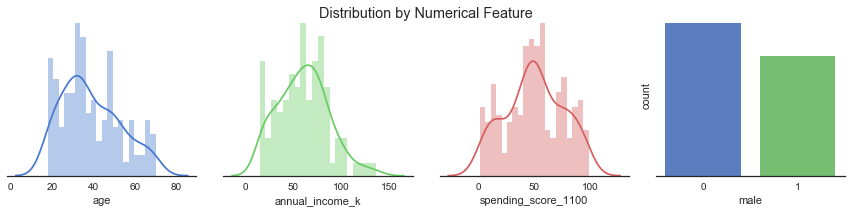

In [70]:
# Numerical features distribution
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.despine(left=True)
axs[0] = sns.distplot(df['age'], bins=20, ax=axs[0], color='b')
axs[1] = sns.distplot(df['annual_income_k'], bins=20, ax=axs[1], color='g')
axs[2] = sns.distplot(df['spending_score_1100'], bins=20, ax=axs[2], color='r')
axs[3] = sns.countplot(x='male', data=df,orient="h")

fig.suptitle('Distribution by Numerical Feature')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.show()

Text(0,0.5,'Customer Age')

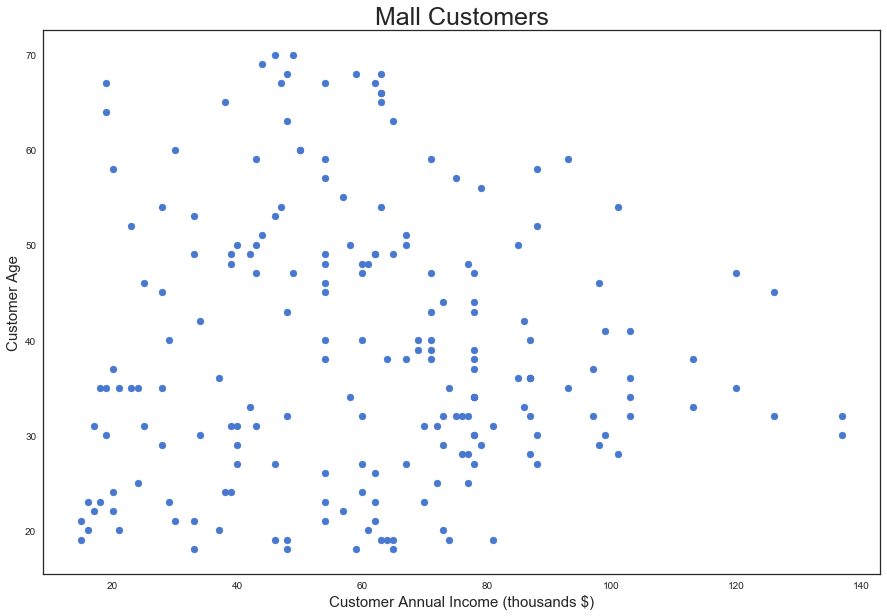

In [114]:
plt.figure(figsize=(15,10))

plt.scatter(df.annual_income_k, df.age)
plt.title('Mall Customers', size = 25)
plt.xlabel('Customer Annual Income (thousands $)', size = 15)
plt.ylabel('Customer Age', size = 15)

## Encode labels

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [22]:
spending_score_1100_n = le.fit_transform(df.spending_score_1100)

In [23]:
spending_score_1100_n

array([30, 67,  4, 64, 31, 63,  4, 79,  1, 59, 12, 83, 13, 64, 11, 66, 28,
       55, 24, 82, 28, 60,  3, 60, 12, 68, 26, 52, 25, 72,  2, 60,  2, 77,
       12, 67, 15, 60, 21, 62, 28, 77, 29, 52, 23, 54, 46, 38, 33, 33, 43,
       51, 45, 51, 36, 32, 41, 37, 42, 37, 47, 46, 43, 50, 42, 50, 41, 39,
       50, 38, 46, 33, 40, 47, 38, 45, 44, 39, 43, 33, 42, 46, 32, 35, 48,
       37, 49, 46, 51, 37, 46, 32, 40, 31, 33, 43, 38, 41, 33, 40, 32, 39,
       50, 46, 47, 33, 41, 37, 34, 39, 43, 45, 33, 37, 39, 41, 34, 50, 34,
       48, 47, 31, 49, 76, 24, 64, 28, 80,  9, 62,  7, 62, 27, 58,  3, 73,
        5, 60,  8, 59,  3, 78, 31, 72, 10, 81, 29, 61, 18, 75, 15, 73, 17,
       63, 14, 74,  0, 65,  0, 60, 28, 69,  3, 78, 21, 62, 17, 80, 22, 53,
       11, 62,  8, 77, 11, 71, 13, 57, 12, 75, 26, 71, 13, 73, 30, 81, 20,
       56, 15, 70, 19, 57,  6, 76, 14, 66, 23, 61, 16, 69])

In [24]:
le.classes_

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       20, 22, 23, 24, 26, 27, 28, 29, 31, 32, 34, 35, 36, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 63, 65, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81,
       82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99])

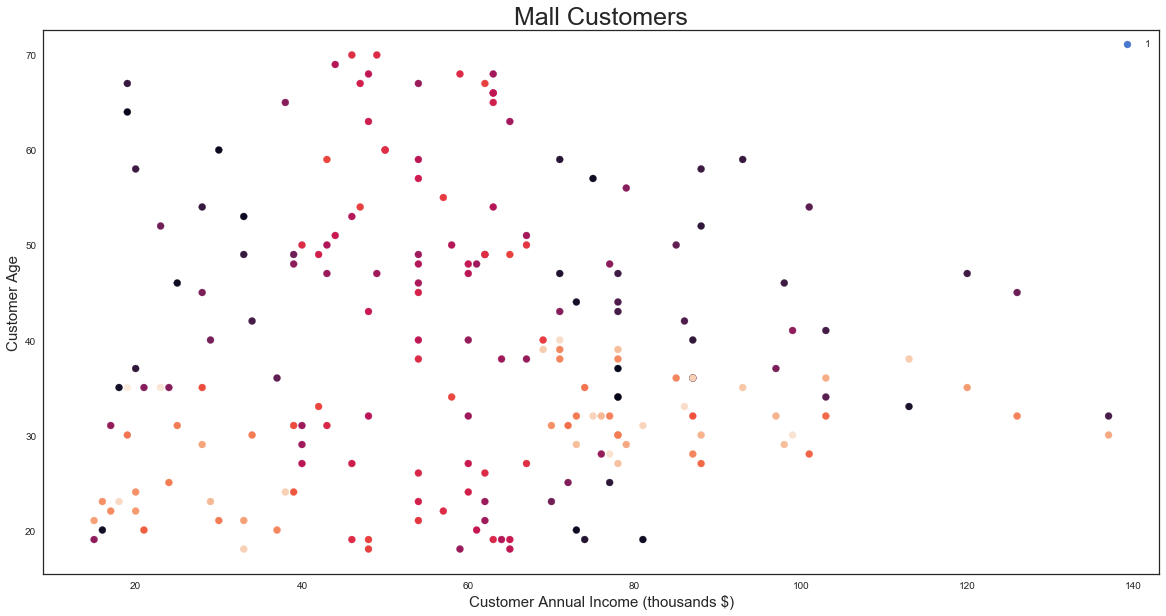

In [115]:
plt.figure(figsize=(20,10))

plt.scatter(df.annual_income_k, df.age, c=spending_score_1100_n)
plt.title('Mall Customers', size = 25)
plt.xlabel('Customer Annual Income (thousands $)', size = 15)
plt.ylabel('Customer Age', size = 15)
plt.legend(le.classes_, loc = 'best')

## Kmeans clustering

K-means clustering belongs to the nonhierarchical class of clustering algorithms.
It is one of the more popular algorithms used for clustering in practice because of its
simplicity and speed. It is considered to be more robust to different types of variables,
is more appropriate for large data sets that are common in marketing, and is less sensitive
to some customers who are outliers (in other words, extremely different from
others).
For K-means clustering, the user has to specify the number of clusters required
before the clustering algorithm is started. The basic algorithm for K-means clustering
is as follows:
1. Choose the number of clusters, k .
2. Generate k random points as cluster centroids.
3. Assign each point to the nearest cluster centroid.
4. Recompute the new cluster centroid.
5. Repeat the two previous steps until some convergence criterion is met. Usually
the convergence criterion is that the assignment of customers to clusters has not
changed over multiple iterations.

In [120]:
from sklearn.cluster import KMeans

X = df[['customerid', 'male', 'age', 'annual_income_k', 'spending_score_1100']]
km = KMeans(3)   # experiment using elbow chart below
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [121]:
centers = km.cluster_centers_
centers

array([[ 96.98591549,   0.46478873,  43.1971831 ,  59.35211268,
         50.5915493 ],
       [166.5       ,   0.45588235,  36.04411765,  88.91176471,
         50.20588235],
       [ 31.01639344,   0.39344262,  36.91803279,  30.36065574,
         49.73770492]])

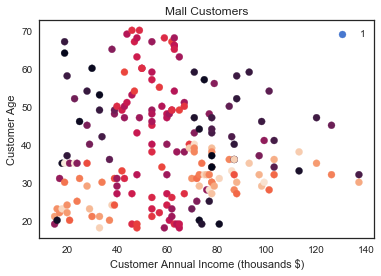

In [122]:
plt.scatter(df.annual_income_k, df.age, c=spending_score_1100_n)
plt.title('Mall Customers')
plt.xlabel('Customer Annual Income (thousands $)')
plt.ylabel('Customer Age')
plt.legend(le.classes_, loc = 'best')

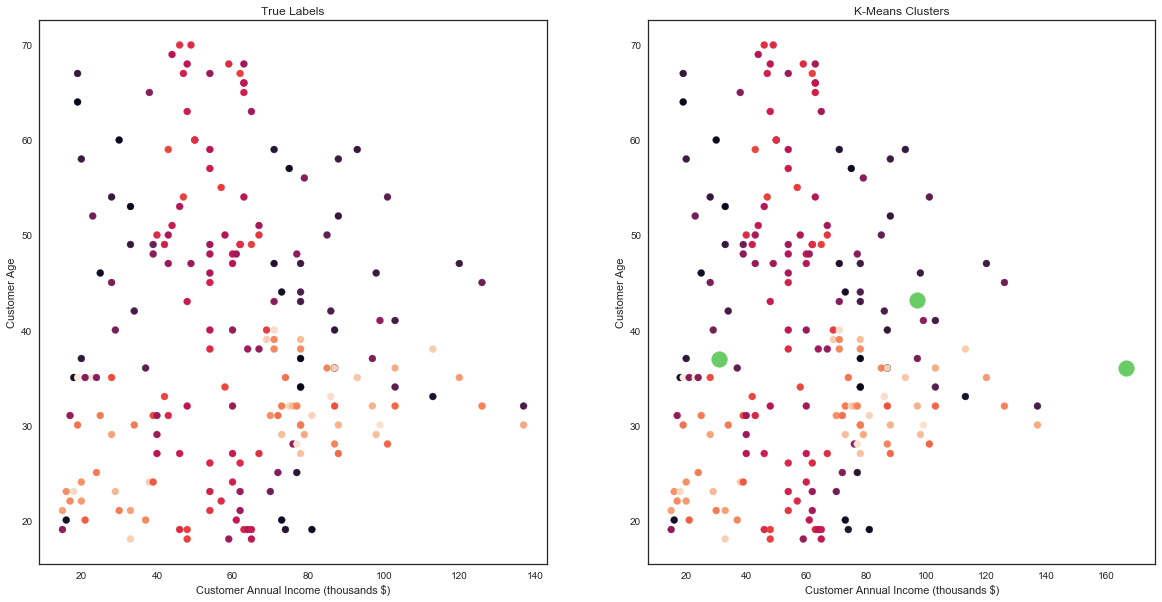

In [123]:
plt.figure(figsize = (20,10))
plt.subplot(121)
plt.scatter(df.annual_income_k, df.age, c=spending_score_1100_n)
plt.xlabel('Customer Annual Income (thousands $)')
plt.ylabel('Customer Age')
plt.title('True Labels')

plt.subplot(122)
plt.scatter(df.annual_income_k, df.age, c=spending_score_1100_n)
plt.scatter(centers[:,0], centers[:,2], marker='o', c='g', s=250)
plt.xlabel('Customer Annual Income (thousands $)')
plt.ylabel('Customer Age')
plt.title('K-Means Clusters')
plt.draw()
plt.show()


## Elbow Criterion

A commonly used method to
determine the number of clusters is the elbow criterion .
The elbow criterion states that you should choose a number of clusters so that
adding another cluster does not add sufficient information. The elbow is identified by
plotting the ratio of the within cluster variance to between cluster variance against the
number of clusters. The within cluster variance is an estimate of the average of the
variance in the variables used as a basis for segmentation (importance score ratings for
premium savings and neighborhood agent in the Geico example) among customers
who belong to a particular cluster. The between cluster variance is an estimate of the
variance of the segmentation basis variables between customers who belong to different
segments. The objective of cluster analysis (as mentioned before) is to minimize
the within cluster variance and maximize the between cluster variance . Therefore,
as the number of clusters is increasing, the ratio of the within cluster variance to the
between cluster variance will keep decreasing.

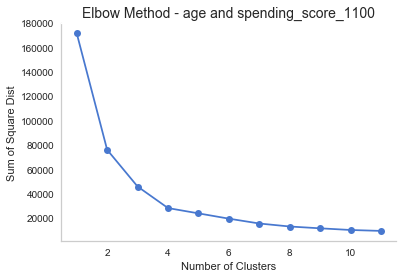

In [112]:
df_1 = df.loc[:, ['age', 'spending_score_1100']]

# Searching for optimun K
plot_elbow_method(df_1)

### Exercise 1
- For Discussion:
    - How many clusters can the algorithm see? Why?
- Change the number of clusters using the n_clusters parameter, and using feedback from the plot_elbow_method. What happens?
- Change the initialization parameters of KMeans to 'random'. What happens?
- Run the clustering multiple times, do the centroid positions change?

*Copyright &copy; 2019 Gino Baltazar All rights reserved.*